# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [23]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [24]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(train['features']) #39209

# TODO: number of testing examples
n_test = len(test['features']) #12630

# TODO: what's the shape of an image?
image_shape = train['features'][0].shape #'square 32 x 32 pixels'

# TODO: how many classes are in the dataset
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(y_train[0])
#for label in y_train:
    #print(label)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
0


The Number of training examples:  39209
The number of testing examples:  12630
The number of training labels:  39209
The number of testing labels:  12630
The image below is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
The number of unique classes is:  43
The number of unique test classes is:  43


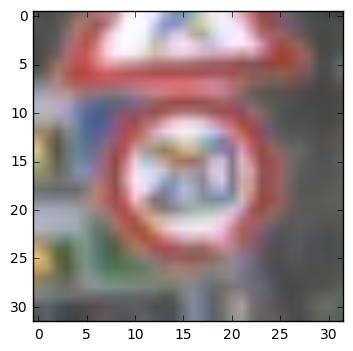

In [25]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#get the counts
print('The Number of training examples: ', len(X_train))
print('The number of testing examples: ', len(X_test))
print('The number of training labels: ', len(y_train))
print('The number of testing labels: ', len(y_test))


image = X_train[0]
#printing out some stats and plotting to get the shape
print('The image below is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image) 

#find the number of classes
unique_labels = []
for label in y_train:
    if not label in unique_labels:
        unique_labels.append(label)
print('The number of unique classes is: ', len(unique_labels))

#check to make sure this is the correct number in the test set
unique_test_labels = []
for label in y_test:
    if not label in unique_test_labels:
        unique_test_labels.append(label)
print('The number of unique test classes is: ', len(unique_test_labels))


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

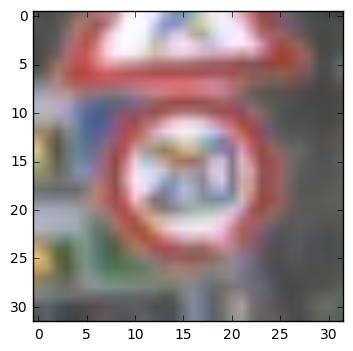

In [26]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
import numpy as np
import cv2

#convert to grayscale
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

grayTrainImages = []
grayTestImages = []
for image in X_train:
    image = (grayscale(image))
for image in X_test:
    image = (grayscale(image))

# X_train = grayTrainImages
# X_test = grayTestImages
#check image grayscale is successful
plt.imshow(X_train[0], cmap='gray') 

#normalize the images
def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-0.5, 0.5]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.5
    b = -0.5
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )

X_train = normalize(X_train)
X_test = normalize(X_test)
    
#One Hot Encoding - from Vivek Yadav in forums
from sklearn.preprocessing import OneHotEncoder

def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels


train_labels = OHE_labels(y_train, 43)
test_labels = OHE_labels(y_test, 43)



### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:** At first I converted the images to grayscale using OpenCV. But since the ConvNet can work with multiple feature layers I decided to leave all 3 channels as there might be important information to specific color channels.
I read here http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf that the grayscale produced better results over 99% so perhaps I should have stuck with the grayscale images. 

After that I applied One Hot Encoding to the labels.

In [27]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# divide the data into train, test, and validation
# the train data is untouched and contains all records. Test data will be split into two portions. 9630
# for testing and the other 3000 for validation. This will mimic the size of the tensorflow MNIST classification
# described at the bottom
X_validate = []
y_validate = []
# pop and remove methods are not working for these lists...I suspect they have been made immutable so
# I'm putting the entries into new arrays
X_test_new = []
y_test_new = []

for i in range(len(X_test)):
    if i > 9629:
        X_validate.append(X_test[i])
        y_validate.append(y_test[i])
    else:
        X_test_new.append(X_test[i])
        y_test_new.append(y_test[i])
    
#check the lengths of the lists
print(len(X_test_new))
print(len(y_test_new))
print(len(X_validate))
print(len(y_validate))

#input_data = [X_train, y_train, X_test_new, y_test_new, X_validate, y_validate]

#from the tensorflow website:
### The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 
### 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). 
### This split is very important: it's essential in machine learning that we have separate data which 
### we don't learn from so that we can make sure that what we've learned actually generalizes!


9630
9630
3000
3000


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** 
After I split the datasets for testing into a new test and validate set I was receiving errors in the code. I left this code in but I am not using it throughout. I am only using the original train and test datasets.

At first I followed the MNIST data and how it was split because I knew if that it worked well for that dataset then it should work similarly . This dataset is smaller so I divided the test data into a new testing set of 9,000 entry points and a new validation set of 3,000 points. This comes close to the 55,000 training, 10,000 test, and 5,000 validation set that the MNIST set uses.

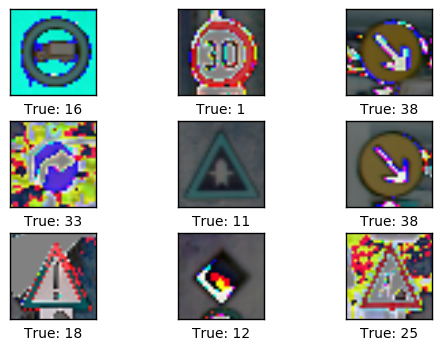

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# I followed along to this tutorial by Magnus Erik Hvass Pedersen at 
# https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb
# This is a ConvNet that includes dropout to achieve better than 90% accuracy

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# Signs are 32 x 32 images
img_size = 32

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size, 3)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 3

# Number of classes
num_classes = 43

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
# Get the first images from the test-set.
images = X_test[0:9]

# Get the true classes for those images.
cls_true = y_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

x = tf.placeholder(tf.float32, shape=[None, 32,32, 3], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

#to implement dropout
keep_prob = tf.placeholder(tf.float32)

layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)
    
layer_conv2, weights_conv2 = \
new_conv_layer(input=layer_conv1,
               num_input_channels=num_filters1,
               filter_size=filter_size2,
               num_filters=num_filters2,
               use_pooling=True)

layer_flat, num_features = flatten_layer(layer_conv2)

#implement dropout before first fc layer
layer_flat_drop = tf.nn.dropout(layer_flat, keep_prob)
layer_fc1 = new_fc_layer(input=layer_flat_drop,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My final architecture is a Convolutional Neural Network with two convolution layers and two fully connected layers. I also implemented dropout based on the example in the TensorFlow tutorial here: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html#convolution-and-pooling

In [29]:
### Train your model here.
### Feel free to use as many code cells as needed.

session = tf.Session()

# Initializing the variables
init = tf.initialize_all_variables()

session.run(init)

train_batch_size = 128

# Simple version to get ith batch, i starts from 0
def getBatch(i, totalBatches, bsize):
    if i < totalBatches-1:
        
        X_train_b = X_train[i*bsize: (i+1)*bsize]
        y_train_b = train_labels[i*bsize: (i+1)*bsize]
    else:
        X_train_b = X_train[i*bsize:]
        y_train_b = train_labels[i*bsize:]
    return X_train_b, y_train_b

def batch(x, y, n):
    idx = np.random.choice(len(x), size=n, replace=False)

    return x[idx, :], y[idx,]

# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        totalBatch = int(len(X_train)/train_batch_size)
        x_batch, y_true_batch = batch(X_train, train_labels, train_batch_size)
        #x_batch, y_true_batch = getBatch(i, totalBatch, train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch,
                           keep_prob: 0.5}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    

def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_test[incorrect]

    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_test[incorrect]

    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])


def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = y_test_new_cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
    
# Split the test-set into smaller batches of this size.
test_batch_size = 128

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(X_test)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = X_test[i:j]

        # Get the associated labels.
        labels = test_labels[i:j]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels,
                     keep_prob: 1.0}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = y_test

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)
        
optimize(num_iterations=10000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()

optimize(num_iterations=1000)
print_test_accuracy()
optimize(num_iterations=1000)
print_test_accuracy()
optimize(num_iterations=1000)
print_test_accuracy()
optimize(num_iterations=1000)
print_test_accuracy()
optimize(num_iterations=1000)
print_test_accuracy()
optimize(num_iterations=1000)
print_test_accuracy()
optimize(num_iterations=500)
print_test_accuracy()
optimize(num_iterations=500)
print_test_accuracy()
optimize(num_iterations=500)
print_test_accuracy()
optimize(num_iterations=500)
print_test_accuracy()
optimize(num_iterations=500)
print_test_accuracy()
optimize(num_iterations=500)
print_test_accuracy()



Optimization Iteration:      1, Training Accuracy:   1.6%
Optimization Iteration:    101, Training Accuracy:  14.1%
Optimization Iteration:    201, Training Accuracy:   9.4%
Optimization Iteration:    301, Training Accuracy:  20.3%
Optimization Iteration:    401, Training Accuracy:  26.6%
Optimization Iteration:    501, Training Accuracy:  29.7%
Optimization Iteration:    601, Training Accuracy:  36.7%
Optimization Iteration:    701, Training Accuracy:  46.1%
Optimization Iteration:    801, Training Accuracy:  36.7%
Optimization Iteration:    901, Training Accuracy:  50.0%
Optimization Iteration:   1001, Training Accuracy:  47.7%
Optimization Iteration:   1101, Training Accuracy:  53.9%
Optimization Iteration:   1201, Training Accuracy:  62.5%
Optimization Iteration:   1301, Training Accuracy:  63.3%
Optimization Iteration:   1401, Training Accuracy:  60.9%
Optimization Iteration:   1501, Training Accuracy:  68.0%
Optimization Iteration:   1601, Training Accuracy:  71.1%
Optimization I

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** My optimizer is the Adam Optimizer which I read a little about here: https://arxiv.org/abs/1412.6980.
I used the SGD optimizer at first but was not achieving >90% accuracy. After reading in the forums I saw several suggestions for this optimizer and I was able to get better results with it.

My training batch size is 128. I tried other batch sizes and my model was not improving accuracy as well. If I got bigger I believe my laptop's memory ran out and I got errors. I went through 27,000 iterations to reach ~96.0% (at one point) accuracy on the test set. I gradually addded more and more iterations until my model got high accuracy.
Other hyperparameters were a filter size of 5 x 5 pixels. The first layer has 16 filters and the second convolutional layer has 36 such filters. The Fully connected size is 128.   

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** I went through a few iterations using different Conv Net configurations that I copied along with from the lesson material, but I was really struggling with the code. I read through all the forums and saw how others were doing and saw that this tutorial by Magnus Erik Hvass Pedersen at # https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb. I followed this tutorial and used the German traffic sign data in full color range. I also implemented dropout afterwards that I found at the TensorFlow tutorial for Convolution Networks and that got my accuracy up above 95% after 25,000 iterations or so.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

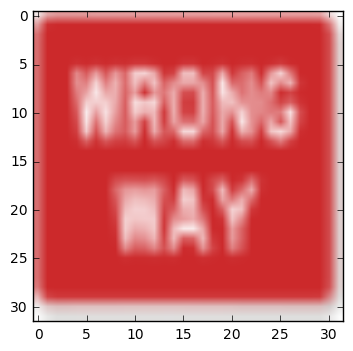

In [59]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
from PIL import Image  # found this in the matplob image tutorial for reading and resizing images
import scipy as sp # scipy.misc.imresize(arr, size, interp='bilinear', mode=None)[source]
image1 = plt.imread('traffic-signs-new/wrong_way_img.png')
image1 = sp.misc.imresize(image1, [32,32,3], interp='bilinear', mode=None)
#image1 = image1.resize((32, 32)) # resizes image in-place
plt.imshow(image1) 

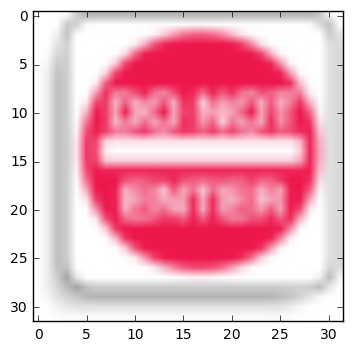

In [60]:
image2 = plt.imread('traffic-signs-new/do_not_enter_img.jpeg')
image2 = sp.misc.imresize(image2, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image2) 

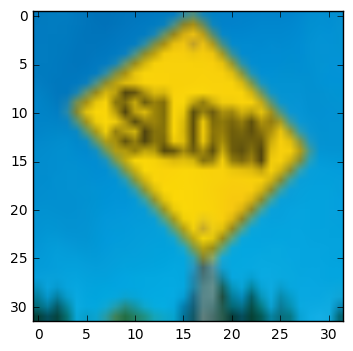

In [61]:
image3 = plt.imread('traffic-signs-new/slow_img.jpeg')
image3 = sp.misc.imresize(image3, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image3) 

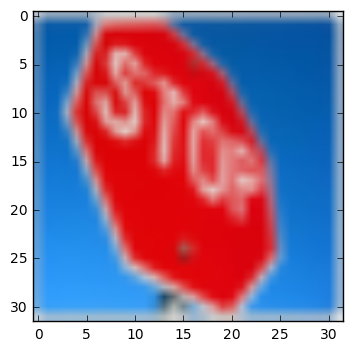

In [62]:
image4 = plt.imread('traffic-signs-new/stop_img.jpeg')
image4 = sp.misc.imresize(image4, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image4) 

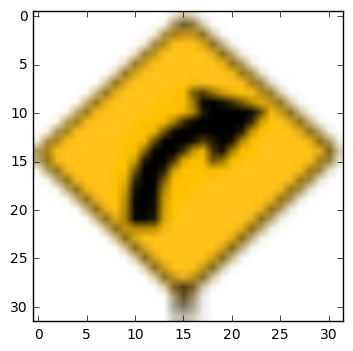

In [63]:
image5 = plt.imread('traffic-signs-new/sharp_right_img.png')
image5 = sp.misc.imresize(image5, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image5)  

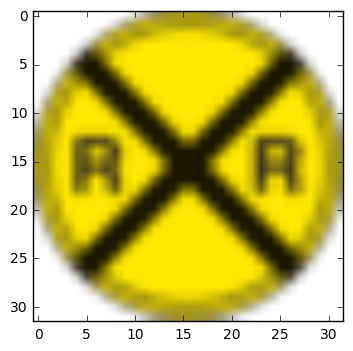

In [64]:
image6 = plt.imread('traffic-signs-new/rr_crossing_img.png')
image6 = sp.misc.imresize(image6, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image6) 

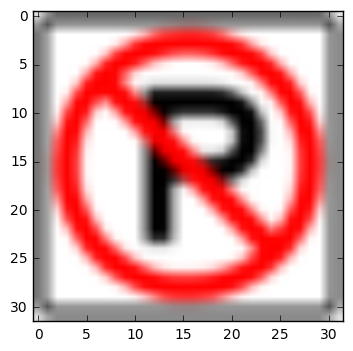

In [65]:
image7 = plt.imread('traffic-signs-new/no_park_img.png')
image7 = sp.misc.imresize(image7, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image7)

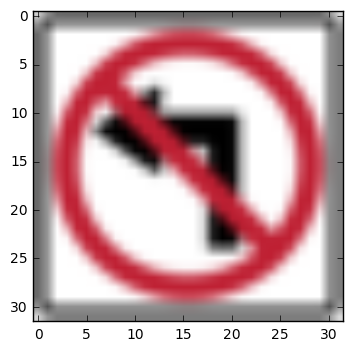

In [66]:
image8 = plt.imread('traffic-signs-new/no_left_img.png')
image8 = sp.misc.imresize(image8, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image8)

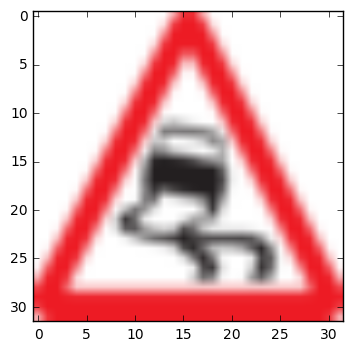

In [67]:
image9 = plt.imread('traffic-signs-new/slippery_img.png')
image9 = sp.misc.imresize(image9, [32,32,3], interp='bilinear', mode=None)
plt.imshow(image9)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** The images I found all have no background images or other objects within the photo. I believe this would make classification easier if trained with photos that had significant backgrounds and other objects within the frame.

A couple of the photos are at different angles such as the stop sign and slow. Different angles of a sign would make it difficult to classify

[12 17 17 14 14  1 12  4 23]


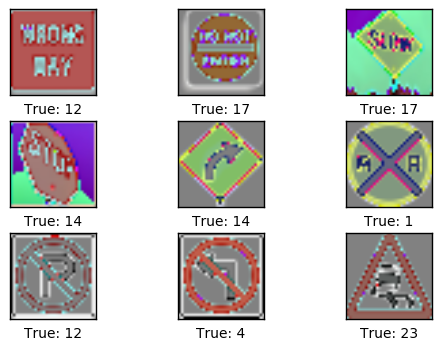

In [68]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# classify images 
sign_images = []
sign_images.append(normalize(image1))
sign_images.append(normalize(image2))
sign_images.append(normalize(image3))
sign_images.append(normalize(image4))
sign_images.append(normalize(image5))
sign_images.append(normalize(image6))
sign_images.append(normalize(image7))
sign_images.append(normalize(image8))
sign_images.append(normalize(image9))

test_batch_size = 9


feed_dict = {x: sign_images,y_true: test_labels,keep_prob: 1.0}

# Calculate the predicted class using TensorFlow.
cls_pred = session.run(y_pred_cls, feed_dict=feed_dict)
print(cls_pred)

plot_images(images=sign_images, cls_true=cls_pred)

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** Not very well. According to the signnames.csv most signs are misclassiflied. A couple surprises were the Stop sign which is 14 and the Do Not Enter sign is listed as No Entry - 17. These signs resembled the German versions enough to be classified as being the same.

In [69]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
# Calculate the predicted class using TensorFlow.
cls_pred = session.run(y_pred, feed_dict=feed_dict)
print(cls_pred)

[[  2.65128674e-18   7.67722241e-08   7.19723706e-13   1.54588228e-23
    6.60326661e-22   8.16974933e-14   1.93600168e-21   4.30938723e-21
    1.17083651e-20   1.44235131e-07   7.67872901e-16   2.13550155e-08
    9.99331236e-01   5.17725375e-14   1.30310882e-17   5.02663762e-17
    2.96095116e-19   6.14194013e-18   3.22176788e-07   1.70376074e-10
    1.67503178e-10   5.23097610e-09   3.92170752e-13   9.16837370e-11
    2.21162585e-12   6.53173774e-04   1.40510423e-07   6.31726116e-10
    4.10631788e-13   5.91835942e-06   4.98549575e-20   2.13777520e-12
    4.78707122e-18   5.60014101e-12   7.62977261e-21   5.91862930e-12
    1.04105201e-12   1.19546876e-14   1.64727294e-15   7.12208860e-17
    8.97809150e-06   6.21987474e-15   4.22853760e-20]
 [  4.85907183e-11   8.59072535e-11   2.78075854e-17   6.55481312e-12
    2.26167384e-23   6.46406146e-14   2.32949460e-28   2.57019227e-17
    1.94153610e-15   1.89038552e-03   1.28645011e-12   2.77840799e-22
    1.62006244e-22   2.01327721e-17 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


In [72]:
topPredicted=tf.nn.top_k(y_pred, k=5, sorted=True, name=None)
result_pred = session.run(topPredicted, feed_dict=feed_dict)
print(result_pred)
for i in range(len(result_pred.indices)):
    print('The top 5 results for image', i+1, ' are ', result_pred.indices[i] , ' with probabilities: \n ', result_pred.values[i])

TopKV2(values=array([[  9.99331236e-01,   6.53173774e-04,   8.97809150e-06,
          5.91835942e-06,   3.22176788e-07],
       [  5.29801250e-01,   4.68308359e-01,   1.89038552e-03,
          8.59072535e-11,   4.85907183e-11],
       [  9.98220742e-01,   1.77925348e-03,   1.77842019e-09,
          8.01768234e-17,   4.38723692e-22],
       [  9.99621034e-01,   3.78984580e-04,   2.81276693e-19,
          4.15435048e-20,   1.58747733e-21],
       [  9.99985218e-01,   1.48198851e-05,   2.11518622e-10,
          1.66345681e-12,   1.12985305e-12],
       [  1.00000000e+00,   1.24402488e-10,   5.71075383e-16,
          8.98659854e-18,   7.31785181e-18],
       [  1.00000000e+00,   1.91827709e-09,   5.27940885e-12,
          2.44347858e-12,   1.91896493e-13],
       [  1.00000000e+00,   1.86478301e-14,   3.26698623e-16,
          1.63514665e-17,   4.19899699e-21],
       [  9.99983668e-01,   1.50898068e-05,   1.21052597e-06,
          9.22495191e-10,   2.18573354e-10]], dtype=float32), indice

**Answer:**  The model appears very certain of its first choice for each sign even though the signs are clearly different for most cases. The model is predicting 100% or 99% accuracy for the first choice every time which is not intuitive. The Do not Enter(17) and Stop (14) signs get classified correctly and that is all. I would think the probabilities would be more equally distributed among the top five (~0.20 each) rather than being certain of the first choice. This leads me to believe that there is more training to do get the accuracy higher and the probabilities for unknown images to be closer.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:** I simply provided a new feed_dict with the newly resized images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.